In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_balance_data():
    pos_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int32, 'SK_DPD': np.int32,
        'SK_DPD_DEF': np.int32, 'CNT_INSTALMENT': np.float32,'CNT_INSTALMENT_FUTURE': np.float32,
    }
    
    install_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'NUM_INSTALMENT_NUMBER': np.int32, 'NUM_INSTALMENT_VERSION': np.float32,
        'DAYS_INSTALMENT': np.float32, 'DAYS_ENTRY_PAYMENT': np.float32, 'AMT_INSTALMENT': np.float32, 'AMT_PAYMENT': np.float32,
    }
    
    card_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL': np.int32, 'CNT_DRAWINGS_CURRENT': np.int32, 'SK_DPD': np.int32,'SK_DPD_DEF': np.int32,
        'AMT_BALANCE': np.float32, 'AMT_DRAWINGS_ATM_CURRENT': np.float32, 'AMT_DRAWINGS_CURRENT': np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT': np.float32, 'AMT_DRAWINGS_POS_CURRENT': np.float32, 'AMT_INST_MIN_REGULARITY': np.float32,
        'AMT_PAYMENT_CURRENT': np.float32, 'AMT_PAYMENT_TOTAL_CURRENT': np.float32, 'AMT_RECEIVABLE_PRINCIPAL': np.float32,
        'AMT_RECIVABLE': np.float32, 'AMT_TOTAL_RECEIVABLE': np.float32, 'CNT_DRAWINGS_ATM_CURRENT': np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT': np.float32, 'CNT_DRAWINGS_POS_CURRENT': np.float32, 'CNT_INSTALMENT_MATURE_CUM': np.float32,
    }
        
    pos_bal = pd.read_csv('../data/home-credit-default-risk/POS_CASH_balance.csv', dtype=pos_dtype)
    install = pd.read_csv('../data/home-credit-default-risk/installments_payments.csv', dtype=install_dtype)
    card_bal = pd.read_csv('../data/home-credit-default-risk/credit_card_balance.csv', dtype=card_dtype)
    
    return pos_bal, install, card_bal

In [4]:
pos_bal, install, card_bal = get_balance_data()
pos_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             uint32 
 1   SK_ID_CURR             uint32 
 2   MONTHS_BALANCE         int32  
 3   CNT_INSTALMENT         float32
 4   CNT_INSTALMENT_FUTURE  float32
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int32  
 7   SK_DPD_DEF             int32  
dtypes: float32(2), int32(3), object(1), uint32(2)
memory usage: 343.4+ MB


In [5]:
pos_bal_temp = pd.read_csv('../data/home-credit-default-risk/POS_CASH_balance.csv')
pos_bal_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [6]:
import gc

del pos_bal_temp
gc.collect()

4

In [7]:
pos_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [8]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_CURR'].count()

SK_ID_CURR
100001     9
100002    19
100003    28
100004     4
100005    11
          ..
456251     9
456252     7
456253    17
456254    20
456255    71
Name: SK_ID_CURR, Length: 337252, dtype: int64

In [9]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_CURR'].count().mean()

29.655444593360453

In [10]:
pos_bal.groupby('SK_ID_PREV')['SK_ID_PREV'].count()

SK_ID_PREV
1000001     3
1000002     5
1000003     4
1000004     8
1000005    11
           ..
2843494     3
2843495     8
2843497    21
2843498     7
2843499    11
Name: SK_ID_PREV, Length: 936325, dtype: int64

In [11]:
pos_bal.groupby('SK_ID_PREV')['SK_ID_PREV'].count().mean()

10.68150268336315

In [12]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().mean()

2.7763363894061412

In [13]:
pos_bal['MONTHS_BALANCE'].value_counts().head(50)

-10    216441
-11    216023
-9     215558
-12    214716
-8     214149
-13    210950
-7     210229
-14    208352
-6     206849
-15    204935
-5     200726
-16    200432
-17    195713
-4     193147
-18    190385
-19    184302
-3     183589
-20    179741
-21    173543
-2     169529
-22    167834
-23    162220
-24    155855
-25    148399
-26    142602
-27    136913
-28    131861
-29    127147
-30    122386
-31    117961
-32    114353
-33    110085
-34    106609
-35    103432
-36     99834
-37     96190
-1      94908
-38     93921
-39     92211
-40     90836
-41     90232
-42     89237
-43     88105
-44     87718
-45     86361
-46     85036
-47     82814
-48     81530
-49     80076
-50     78269
Name: MONTHS_BALANCE, dtype: int64

<AxesSubplot:>

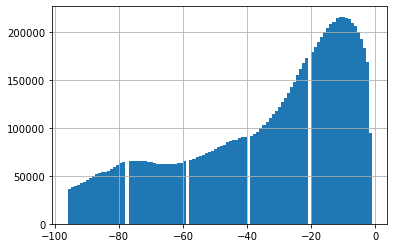

In [14]:
pos_bal['MONTHS_BALANCE'].hist(bins=100)

<AxesSubplot:>

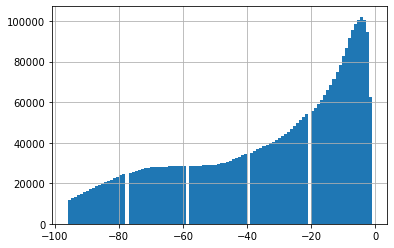

In [15]:
card_bal['MONTHS_BALANCE'].hist(bins=100)

<AxesSubplot:xlabel='MONTHS_BALANCE'>

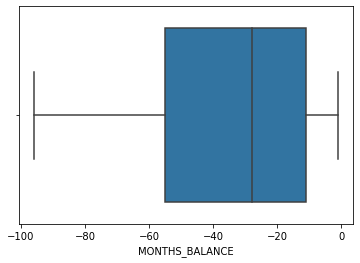

In [16]:
sns.boxplot(card_bal['MONTHS_BALANCE'])

<AxesSubplot:>

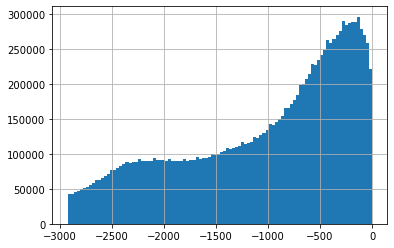

In [17]:
install['DAYS_INSTALMENT'].hist(bins=100)

In [18]:
card_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  uint32 
 1   SK_ID_CURR                  uint32 
 2   MONTHS_BALANCE              int16  
 3   AMT_BALANCE                 float32
 4   AMT_CREDIT_LIMIT_ACTUAL     int32  
 5   AMT_DRAWINGS_ATM_CURRENT    float32
 6   AMT_DRAWINGS_CURRENT        float32
 7   AMT_DRAWINGS_OTHER_CURRENT  float32
 8   AMT_DRAWINGS_POS_CURRENT    float32
 9   AMT_INST_MIN_REGULARITY     float32
 10  AMT_PAYMENT_CURRENT         float32
 11  AMT_PAYMENT_TOTAL_CURRENT   float32
 12  AMT_RECEIVABLE_PRINCIPAL    float32
 13  AMT_RECIVABLE               float32
 14  AMT_TOTAL_RECEIVABLE        float32
 15  CNT_DRAWINGS_ATM_CURRENT    float32
 16  CNT_DRAWINGS_CURRENT        int32  
 17  CNT_DRAWINGS_OTHER_CURRENT  float32
 18  CNT_DRAWINGS_POS_CURRENT    float32
 19  CNT_INSTALMENT_MATURE

In [19]:
card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [20]:
pos_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             uint32 
 1   SK_ID_CURR             uint32 
 2   MONTHS_BALANCE         int32  
 3   CNT_INSTALMENT         float32
 4   CNT_INSTALMENT_FUTURE  float32
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int32  
 7   SK_DPD_DEF             int32  
dtypes: float32(2), int32(3), object(1), uint32(2)
memory usage: 343.4+ MB


In [21]:
pos_bal.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [22]:
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              uint32 
 1   SK_ID_CURR              uint32 
 2   NUM_INSTALMENT_VERSION  float32
 3   NUM_INSTALMENT_NUMBER   int32  
 4   DAYS_INSTALMENT         float32
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
dtypes: float32(5), int32(1), uint32(2)
memory usage: 415.2 MB


In [23]:
install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [24]:
pos_bal['SK_DPD'].value_counts()

0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3278          1
3280          1
3282          1
3284          1
4231          1
Name: SK_DPD, Length: 3400, dtype: int64

In [25]:
pos_bal.shape

(10001358, 8)

In [26]:
cond_over_0 = pos_bal['SK_DPD'] > 0
cond_over_0_30 = (pos_bal['SK_DPD'] > 0) & (pos_bal['SK_DPD'] <= 30)
cond_over_30_120 =  (pos_bal['SK_DPD'] > 30) & (pos_bal['SK_DPD'] < 120)
cond_over_120 = (pos_bal['SK_DPD'] >= 120)

print(f'연체 비율: {pos_bal[cond_over_0].shape[0] / pos_bal.shape[0]}')
print(f'연체 비율 30일 미만: {pos_bal[cond_over_0_30].shape[0] / pos_bal.shape[0]}')
print(f'연체 비율 30일 이상 120 이하: {pos_bal[cond_over_30_120].shape[0] / pos_bal.shape[0]}')
print(f'연체 비율 120일 이상: {pos_bal[cond_over_120].shape[0] / pos_bal.shape[0]}')

연체 비율: 0.02951869136171308
연체 비율 30일 미만: 0.01631468446584954
연체 비율 30일 이상 120 이하: 0.0017282653015720465
연체 비율 120일 이상: 0.011475741594291496


In [27]:
pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

In [28]:
pos_bal[cond_over_120].head(20)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,POS_IS_DPD,POS_IS_DPD_UNDER_120,POS_IS_DPD_OVER_120
2252,2562793,287880,-46,7.0,0.0,Active,1105,0,1,0,1
3507,1290101,322484,-37,6.0,0.0,Active,329,0,1,0,1
3996,2002705,413918,-48,6.0,0.0,Active,146,0,1,0,1
4438,1184431,369596,-44,6.0,0.0,Active,173,0,1,0,1
5234,1526249,275666,-39,12.0,0.0,Active,798,0,1,0,1
5290,2273596,343663,-45,6.0,0.0,Active,143,0,1,0,1
5787,1473810,167948,-40,12.0,0.0,Active,566,0,1,0,1
5788,2749600,365698,-35,12.0,0.0,Active,566,0,1,0,1
5904,1463725,265782,-36,6.0,0.0,Active,324,0,1,0,1
5918,2797839,172911,-39,6.0,0.0,Active,182,0,1,0,1


In [29]:
pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
pos_bal_agg_dict = {
    'SK_ID_CURR': ['count'], 
    'MONTHS_BALANCE': ['min', 'mean', 'max'], 
    'SK_DPD': ['min', 'max', 'mean'],

    'POS_IS_DPD': ['mean', 'sum'],
    'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
    'POS_IS_DPD_OVER_120': ['mean', 'sum'],
}

pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
pos_bal_agg.columns = [('POS_') + ('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]

In [30]:
pos_bal_agg.head(20)

,POS_SK_ID_CURR_COUNT,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MIN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_POS_IS_DPD_MEAN,POS_POS_IS_DPD_SUM,POS_POS_IS_DPD_UNDER_120_MEAN,POS_POS_IS_DPD_UNDER_120_SUM,POS_POS_IS_DPD_OVER_120_MEAN,POS_POS_IS_DPD_OVER_120_SUM
SK_ID_CURR,,,,,,,,,,,,,
100001,9,-96,-72.555556,-53,0,7,0.777778,0.111111,1,0.111111,1,0.000000,0
100002,19,-19,-10.000000,-1,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100003,28,-77,-43.785714,-18,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100004,4,-27,-25.500000,-24,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100005,11,-25,-20.000000,-15,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100006,21,-20,-9.619048,-1,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100007,66,-77,-33.636364,-1,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
100008,83,-84,-43.662651,-2,0,1294,339.060241,0.518072,43,0.048193,4,0.469880,39
100009,64,-96,-33.062500,-1,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0


In [31]:
cond_months = pos_bal['MONTHS_BALANCE'] > -20
pos_bal[cond_months].groupby('SK_ID_CURR')['SK_ID_CURR'].count().shape

(272296,)

In [32]:
pos_bal.groupby('SK_ID_CURR')['SK_ID_CURR'].count().shape

(337252,)

In [33]:
cond_months = pos_bal['MONTHS_BALANCE'] > -20
pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
pos_bal_agg_dict = {
    'SK_ID_CURR': ['count'], 
    'MONTHS_BALANCE': ['min', 'mean', 'max'], 
    'SK_DPD': ['min', 'max', 'mean'],

    'POS_IS_DPD': ['mean', 'sum'],
    'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
    'POS_IS_DPD_OVER_120': ['mean', 'sum'],
}

pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
pos_bal_m20_agg.columns = [('POS_M20')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]

In [34]:
pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
pos_bal_agg = pos_bal_agg.reset_index()
pos_bal_agg.shape

(337252, 27)

In [35]:
install.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375000,5970.375000
6,2234264,184693,4.0,11,-349.0,-352.0,29432.294922,29432.294922
7,1818599,111420,2.0,4,-968.0,-994.0,17862.164062,17862.164062
8,2723183,112102,0.0,14,-197.0,-197.0,70.739998,70.739998
9,1413990,109741,1.0,4,-570.0,-609.0,14308.469727,14308.469727


In [36]:
install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
install['AMT_RATIO'] = (install['AMT_PAYMENT'] + 1) / (install['AMT_INSTALMENT'] + 1)

install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
install.head(20)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,SK_DPD
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375000,5970.375000,0.000000,1.000000,-33.0
6,2234264,184693,4.0,11,-349.0,-352.0,29432.294922,29432.294922,0.000000,1.000000,-3.0
7,1818599,111420,2.0,4,-968.0,-994.0,17862.164062,17862.164062,0.000000,1.000000,-26.0
8,2723183,112102,0.0,14,-197.0,-197.0,70.739998,70.739998,0.000000,1.000000,0.0
9,1413990,109741,1.0,4,-570.0,-609.0,14308.469727,14308.469727,0.000000,1.000000,-39.0


In [37]:
cond_over_0 = install['SK_DPD'] > 0
cond_over_0_30 = (install['SK_DPD'] > 0) & (install['SK_DPD'] <= 30)
cond_over_30_120 =  (install['SK_DPD'] > 30) & (install['SK_DPD'] < 120)
cond_over_120 = (install['SK_DPD'] >= 120)

print(f'연체 비율: {install[cond_over_0].shape[0] / install.shape[0]}')
print(f'연체 비율 30일 미만: {install[cond_over_0_30].shape[0] / install.shape[0]}')
print(f'연체 비율 30일 이상 120 이하: {install[cond_over_30_120].shape[0] / install.shape[0]}')
print(f'연체 비율 120일 이상: {install[cond_over_120].shape[0] / install.shape[0]}')

연체 비율: 0.08428042657471103
연체 비율 30일 미만: 0.08144023097885905
연체 비율 30일 이상 120 이하: 0.002042791682509027
연체 비율 120일 이상: 0.0007974039133429437


In [38]:
install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

In [39]:
install.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,SK_DPD,INS_IS_DPD,INS_IS_DPD_UNDER_120,INS_IS_DPD_OVER_120
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0,0,0,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0,0,0,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0,0,0,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0,0,0,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0,1,1,0
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375000,5970.375000,0.000000,1.000000,-33.0,0,0,0
6,2234264,184693,4.0,11,-349.0,-352.0,29432.294922,29432.294922,0.000000,1.000000,-3.0,0,0,0
7,1818599,111420,2.0,4,-968.0,-994.0,17862.164062,17862.164062,0.000000,1.000000,-26.0,0,0,0
8,2723183,112102,0.0,14,-197.0,-197.0,70.739998,70.739998,0.000000,1.000000,0.0,0,0,0
9,1413990,109741,1.0,4,-570.0,-609.0,14308.469727,14308.469727,0.000000,1.000000,-39.0,0,0,0


In [40]:
install_grp = install.groupby('SK_ID_CURR')
install_agg_dict = {
    'SK_ID_CURR': ['count'],
    'NUM_INSTALMENT_VERSION': ['nunique'], 
    'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
    'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
    'AMT_INSTALMENT': ['mean', 'max', 'sum'],
    'AMT_PAYMENT': ['mean', 'max','sum'],

    'AMT_DIFF': ['mean','min', 'max','sum'],
    'AMT_RATIO':[ 'mean', 'max'],
    'SK_DPD': ['mean', 'min', 'max'],
    'INS_IS_DPD': ['mean', 'sum'],
    'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
    'INS_IS_DPD_OVER_120': ['mean', 'sum'],
}

install_agg = install_grp.agg(install_agg_dict)
install_agg.columns = [('INS_') + ('_').join(column).upper() for column in install_agg.columns.ravel()]

In [41]:
install.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,SK_DPD,INS_IS_DPD,INS_IS_DPD_UNDER_120,INS_IS_DPD_OVER_120
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0,0,0,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0,0,0,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0,0,0,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0,0,0,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0,1,1,0
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375000,5970.375000,0.000000,1.000000,-33.0,0,0,0
6,2234264,184693,4.0,11,-349.0,-352.0,29432.294922,29432.294922,0.000000,1.000000,-3.0,0,0,0
7,1818599,111420,2.0,4,-968.0,-994.0,17862.164062,17862.164062,0.000000,1.000000,-26.0,0,0,0
8,2723183,112102,0.0,14,-197.0,-197.0,70.739998,70.739998,0.000000,1.000000,0.0,0,0,0
9,1413990,109741,1.0,4,-570.0,-609.0,14308.469727,14308.469727,0.000000,1.000000,-39.0,0,0,0


In [42]:
cond_day = install['DAYS_ENTRY_PAYMENT'] >= -365
install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
install_agg_dict = {
    'SK_ID_CURR': ['count'],
    'NUM_INSTALMENT_VERSION': ['nunique'], 
    'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
    'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
    'AMT_INSTALMENT': ['mean', 'max', 'sum'],
    'AMT_PAYMENT': ['mean', 'max','sum'],

    'AMT_DIFF': ['mean','min', 'max','sum'],
    'AMT_RATIO':[ 'mean', 'max'],
    'SK_DPD': ['mean', 'min', 'max'],
    'INS_IS_DPD': ['mean', 'sum'],
    'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
    'INS_IS_DPD_OVER_120': ['mean', 'sum'],
}

install_d365_agg = install_d365_grp.agg(install_agg_dict)
install_d365_agg.columns = [('INS_d365')+('_').join(column).upper() for column in install_d365_agg.columns.ravel()]

In [43]:
install_agg = install_agg.merge(install_d365_agg, on='SK_ID_CURR', how='left')
install_agg = install_agg.reset_index()
install_agg.shape

(339587, 59)

In [44]:
card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [45]:
card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']
card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

In [46]:
cond_over_0 = card_bal['SK_DPD'] > 0
cond_over_0_30 = (card_bal['SK_DPD'] > 0) & (card_bal['SK_DPD'] <= 30)
cond_over_30_120 =  (card_bal['SK_DPD'] > 30) & (card_bal['SK_DPD'] < 120)
cond_over_120 = (card_bal['SK_DPD'] >= 120)

print(f'연체 비율: {card_bal[cond_over_0].shape[0] / card_bal.shape[0]}')
print(f'연체 비율 30일 미만: {card_bal[cond_over_0_30].shape[0] / card_bal.shape[0]}')
print(f'연체 비율 30일 이상 120 이하: {card_bal[cond_over_30_120].shape[0] / card_bal.shape[0]}')
print(f'연체 비율 120일 이상: {card_bal[cond_over_120].shape[0] / card_bal.shape[0]}')

연체 비율: 0.039932953364205825
연체 비율 30일 미만: 0.025626303279525205
연체 비율 30일 이상 120 이하: 0.0022019044285985097
연체 비율 120일 이상: 0.01210474565608211


In [47]:
card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

In [48]:
card_bal.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,BALANCE_LIMIT_RATIO,DRAWING_LIMIT_RATIO,CARD_IS_DPD,CARD_IS_DPD_UNDER_120,CARD_IS_DPD_OVER_120
0,2562384,378907,-6,56.970001,135000,0.0,877.500000,0.0,877.500000,1700.324951,...,1.0,35.0,Active,0,0,0.000422,0.006500,0,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.000000,0.0,0.000000,2250.000000,...,0.0,69.0,Active,0,0,1.421679,0.050000,0,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.000000,0.0,0.000000,2250.000000,...,0.0,30.0,Active,0,0,0.070700,0.000000,0,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.000000,0.0,0.000000,11795.759766,...,0.0,10.0,Active,0,0,1.051432,0.010000,0,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.000000,0.0,11547.000000,22924.890625,...,1.0,101.0,Active,0,0,1.008710,0.025660,0,0,0
5,2646502,380010,-7,82903.812500,270000,0.0,0.000000,0.0,0.000000,4449.104980,...,0.0,2.0,Active,7,0,0.307051,0.000000,1,1,0
6,1079071,171320,-6,353451.656250,585000,67500.0,67500.000000,0.0,0.000000,14684.174805,...,0.0,6.0,Active,0,0,0.604191,0.115385,0,0,0
7,2095912,118650,-7,47962.125000,45000,45000.0,45000.000000,0.0,0.000000,0.000000,...,0.0,51.0,Active,0,0,1.065825,1.000000,0,0,0
8,2181852,367360,-4,291543.062500,292500,90000.0,289339.437500,0.0,199339.421875,130.500000,...,5.0,3.0,Active,0,0,0.996728,0.989195,0,0,0
9,1235299,203885,-5,201261.187500,225000,76500.0,111026.703125,0.0,34526.699219,6338.339844,...,6.0,38.0,Active,0,0,0.894494,0.493452,0,0,0


In [49]:
card_bal_grp = card_bal.groupby('SK_ID_CURR')
card_bal_agg_dict = {
    'SK_ID_CURR': ['count'],
    'AMT_BALANCE': ['max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],

    'BALANCE_LIMIT_RATIO': ['min','max'],
    'DRAWING_LIMIT_RATIO': ['min', 'max'],
    'CARD_IS_DPD': ['mean', 'sum'],
    'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
    'CARD_IS_DPD_OVER_120': ['mean', 'sum'],
}

card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
card_bal_agg.columns = [('CARD_') + ('_').join(column).upper() for column in card_bal_agg.columns.ravel()]

In [50]:
cond_month = card_bal['MONTHS_BALANCE'] >= -3
card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')

card_bal_agg_dict = {
    'SK_ID_CURR': ['count'],
    'AMT_BALANCE': ['max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],

    'BALANCE_LIMIT_RATIO': ['min','max'],
    'DRAWING_LIMIT_RATIO': ['min', 'max'],
    'CARD_IS_DPD': ['mean', 'sum'],
    'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
    'CARD_IS_DPD_OVER_120': ['mean', 'sum'],    
}

card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
card_bal_m3_agg.columns = ['CARD_M3'+('_').join(column).upper() for column in card_bal_m3_agg.columns.ravel()]

In [51]:
card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
card_bal_agg = card_bal_agg.reset_index()

In [52]:
print(f'pos_bal_agg shape: {pos_bal_agg.shape}\ninstall_agg shape: {install_agg.shape}\ncard_bal_agg shape: {card_bal_agg.shape}')

pos_bal_agg shape: (337252, 27)
install_agg shape: (339587, 59)
card_bal_agg shape: (103558, 69)


In [53]:
def get_pos_bal_agg(pos_ball):
    
    pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
    pos_bal_agg.columns = [('POS_') + ('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]

    cond_months = pos_bal['MONTHS_BALANCE'] > -20
    pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
    pos_bal_m20_agg.columns = [('POS_M20')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]

    pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
    pos_bal_agg = pos_bal_agg.reset_index()
    
    return pos_bal_agg

In [54]:
def get_install_agg(install):

    install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
    install['AMT_RATIO'] = (install['AMT_PAYMENT'] + 1) / (install['AMT_INSTALMENT'] + 1)

    install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
    
    install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    install_grp = install.groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_agg = install_grp.agg(install_agg_dict)
    install_agg.columns = [('INS_') + ('_').join(column).upper() for column in install_agg.columns.ravel()]

    cond_day = install['DAYS_ENTRY_PAYMENT'] >= -365
    install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_d365_agg = install_d365_grp.agg(install_agg_dict)
    install_d365_agg.columns = [('INS_d365')+('_').join(column).upper() for column in install_d365_agg. columns.ravel()]

    install_agg = install_agg.merge(install_d365_agg, on='SK_ID_CURR', how='left')
    install_agg = install_agg.reset_index()
    
    return install_agg

In [55]:
def get_card_bal_agg(card_bal):

    card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']
    card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

    card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    card_bal_grp = card_bal.groupby('SK_ID_CURR')
    card_bal_agg_dict = {
        'SK_ID_CURR': ['count'],
        'AMT_BALANCE': ['max'],
        'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],

        'BALANCE_LIMIT_RATIO': ['min','max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'CARD_IS_DPD': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
    card_bal_agg.columns = [('CARD_') + ('_').join(column).upper() for column in card_bal_agg.columns.ravel()]
    
    card_bal_agg = card_bal_agg.reset_index()

    cond_month = card_bal['MONTHS_BALANCE'] >= -3
    card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')

    card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
    card_bal_m3_agg.columns = ['CARD_M3'+('_').join(column).upper() for column in card_bal_m3_agg.  columns.ravel()]

    card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
    card_bal_agg = card_bal_agg.reset_index()
    
    return card_bal_agg

In [56]:
pos_bal_agg = get_pos_bal_agg(pos_bal)
install_agg = get_install_agg(install)
card_bal_agg = get_card_bal_agg(card_bal)

print(f'pos_bal_agg shape: {pos_bal_agg.shape}\ninstall_agg shape: {install_agg.shape}\ncard_bal_agg shape: {card_bal_agg.shape}')

pos_bal_agg shape: (337252, 27)
install_agg shape: (339587, 59)
card_bal_agg shape: (103558, 70)


In [57]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def get_apps_processed(apps):
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
    
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']
    
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps


def get_prev_processed(prev):
    
    prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']
    
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
    
    all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['PREV_INTERESTS_RATE'] = (all_pay / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']
    
    return prev


def get_prev_amt_agg(prev):    

    agg_dict = {
         # 기존 컬럼. 
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        # 가공 컬럼
        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_group = prev.groupby('SK_ID_CURR')
    prev_amt_agg = prev_group.agg(agg_dict)
    prev_amt_agg.columns = ['PREV_' + ('_').join(column).upper() for column in prev_amt_agg.columns.ravel()]
    prev_amt_agg = prev_amt_agg.reset_index()
    
    return prev_amt_agg


def get_prev_refused_appr_agg(prev):

    prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
    prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
    prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
    prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT']
    prev_refused_appr_agg = prev_refused_appr_agg.reset_index()
    
    return prev_refused_appr_agg


def get_prev_agg(prev):
    
    prev = get_prev_processed(prev)
    prev_amt_agg = get_prev_amt_agg(prev)
    prev_refused_appr_agg = get_prev_refused_appr_agg(prev)
    
    prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
    prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
    
    return prev_agg


def get_apps_all_with_prev_agg(apps, prev):

    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    print('prev_agg shape:', prev_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    print('apps_all after merge with prev_agg shape:', apps_all.shape)
    
    return apps_all


def get_apps_all_encoded(apps_all):
    
    object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()
    for column in object_columns:
        apps_all[column] = pd.factorize(apps_all[column])[0]
    
    return apps_all


def get_apps_all_train_test(apps_all):

    apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
    apps_all_test = apps_all[apps_all['TARGET'].isnull()]
    apps_all_test = apps_all_test.drop('TARGET', axis=1)
    
    return apps_all_train, apps_all_test


def train_apps_all(apps_all_train):
    
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']

    train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=0)
    print(f'train shape: {train_x.shape}, valid shape: {valid_x.shape}')
    
    clf = LGBMClassifier(
        n_jobs=-1, 
        n_estimators=2000, 
        learning_rate=0.02,
        # from hyper_parameter_tuning (BayesianOptimization)
        colsample_bytree=0.601,
        max_bin=348, 
        max_depth=12, 
        min_child_samples=107, 
        min_child_weight=8, 
        num_leaves=61, 
        reg_alpha=11.964, 
        reg_lambda=5.513, 
        subsample=0.773,
        silent=-1, 
        verbose=-1,
    )
    
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric='auc', verbose=100, early_stopping_rounds=100)
    
    return clf

In [58]:
bureau_agg_dict = {
    'SK_ID_BUREAU': ['count'],
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],

    'BUREAU_ENDDATE_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_IS_DPD': ['mean', 'sum'],
    'BUREAU_IS_DPD_OVER120': ['mean', 'sum'],
}

bureau_bal_agg_dict = {
    'SK_ID_CURR': ['count'],
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'BUREAU_BAL_IS_DPD': ['mean', 'sum'],
    'BUREAU_BAL_IS_DPD_OVER120': ['mean', 'sum'],
}

def get_bureau_processed(bureau):
    
    bureau['BUREAU_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']

    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
    bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']\
    
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)
    
    return bureau


def get_bureau_day_amt_agg(bureau):     

    bureau_grp = bureau.groupby('SK_ID_CURR')
    bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
    bureau_day_amt_agg.columns = ['BUREAU_' + ('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
    bureau_day_amt_agg = bureau_day_amt_agg.reset_index()
    
    return bureau_day_amt_agg


def get_bureau_active_agg(bureau):
    
    cond_active = bureau['CREDIT_ACTIVE'] == 'Active'
    bureau_active_grp = bureau[cond_active].groupby('SK_ID_CURR')
    bureau_active_agg = bureau_active_grp.agg(bureau_agg_dict)
    bureau_active_agg.columns = ['BUREAU_ACT_' + ('_').join(column).upper() for column in bureau_active_agg.columns.ravel()]
    bureau_active_agg = bureau_active_agg.reset_index()
    
    return bureau_active_agg


def get_bureau_bal_agg(bureau, bureau_bal):
    
    bureau_bal = bureau_bal.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='left')
    bureau_bal['BUREAU_BAL_IS_DPD'] = bureau_bal['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)
    bureau_bal['BUREAU_BAL_IS_DPD_OVER120'] = bureau_bal['STATUS'].apply(lambda x: 1 if x == '5' else 0)
    bureau_bal_grp = bureau_bal.groupby('SK_ID_CURR')
    bureau_bal_agg = bureau_bal_grp.agg(bureau_bal_agg_dict)
    bureau_bal_agg.columns = ['BUREAU_BAL_' + ('_').join(column).upper() for column in bureau_bal_agg.columns.ravel()]
    bureau_bal_agg = bureau_bal_agg.reset_index()
    
    return bureau_bal_agg


def get_bureau_agg(bureau, bureau_bal):
    
    bureau = get_bureau_processed(bureau)
    bureau_day_amt_agg = get_bureau_day_amt_agg(bureau)
    bureau_active_agg = get_bureau_active_agg(bureau)
    bureau_bal_agg = get_bureau_bal_agg(bureau, bureau_bal)
    bureau_agg = bureau_day_amt_agg.merge(bureau_active_agg, on='SK_ID_CURR', how='left')
    bureau_agg = bureau_agg.merge(bureau_bal_agg, on='SK_ID_CURR', how='left')
    print(f'bureau_agg shape: {bureau_agg.shape}')
    
    return bureau_agg

In [59]:
def get_apps_all_with_all_agg(apps, prev, bureau, bureau_bal, pos_bal, install, card_bal):
    
    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    bureau_agg = get_bureau_agg(bureau, bureau_bal)
    pos_ball_agg = get_pos_bal_agg(pos_bal)
    install_agg = get_install_agg(install)
    card_bal_agg = get_card_bal_agg(card_bal)
    
    print(f'prev_agg shape: {prev_agg.shape}\nbureau_agg shape: {bureau_agg.shape}')
    print(f'pos_bal_agg shape: {pos_bal_agg.shape}\ninstall_agg shape: {install_agg.shape}\ncard_bal_agg shape: {card_bal_agg.shape}')
    print(f'apps_all before merge shape: {apps_all.shape}')
    
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(bureau_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(install_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(card_bal_agg, on='SK_ID_CURR', how='left')
    
    print(f'apps_all after merge with all shape: {apps_all.shape}')
    
    return apps_all

In [60]:
def get_dataset():
    app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
    app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')
    apps = pd.concat([app_train, app_test])
    prev = pd.read_csv('../data/home-credit-default-risk/previous_application.csv')
    bureau = pd.read_csv('../data/home-credit-default-risk/bureau.csv')
    bureau_balance = pd.read_csv('../data/home-credit-default-risk/bureau_balance.csv')
    pos_bal, install, card_bal = get_balance_data()
    
    return apps, prev, bureau, bureau_balance, pos_bal, install, card_bal

In [61]:
apps, prev, bureau, bureau_balance, pos_bal, install, card_bal = get_dataset()

In [62]:
apps_all = get_apps_all_with_all_agg(apps, prev, bureau, bureau_balance, pos_bal, install, card_bal)
apps_all = get_apps_all_encoded(apps_all)
apps_all_train, apps_all_test = get_apps_all_train_test(apps_all)

bureau_agg shape: (305811, 101)
prev_agg shape: (338857, 42)
bureau_agg shape: (305811, 101)
pos_bal_agg shape: (337252, 27)
install_agg shape: (339587, 59)
card_bal_agg shape: (103558, 70)
apps_all before merge shape: (356255, 136)
apps_all after merge with all shape: (356255, 430)


In [63]:
clf = train_apps_all(apps_all_train)

train shape: (215257, 428), valid shape: (92254, 428)
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.793416	training's binary_logloss: 0.24077	valid_1's auc: 0.769079	valid_1's binary_logloss: 0.243417
[200]	training's auc: 0.813903	training's binary_logloss: 0.230121	valid_1's auc: 0.781288	valid_1's binary_logloss: 0.237326
[300]	training's auc: 0.828614	training's binary_logloss: 0.223384	valid_1's auc: 0.787072	valid_1's binary_logloss: 0.234929
[400]	training's auc: 0.841181	training's binary_logloss: 0.217998	valid_1's auc: 0.790371	valid_1's binary_logloss: 0.2337
[500]	training's auc: 0.852292	training's binary_logloss: 0.213217	valid_1's auc: 0.792713	valid_1's binary_logloss: 0.232842
[600]	training's auc: 0.862531	training's binary_logloss: 0.208817	valid_1's auc: 0.794155	valid_1's binary_logloss: 0.232361
[700]	training's auc: 0.871842	training's binary_logloss: 0.204711	valid_1's auc: 0.794982	valid_1's binary_logloss: 0.232063
[800]

In [64]:
preds = clf.predict_proba(apps_all_test.drop(['SK_ID_CURR'], axis=1))[:, 1]
apps_all_test['TARGET'] = preds
apps_all_test[['SK_ID_CURR', 'TARGET']].to_csv('../result/pos_installment_creditcard_result_01.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

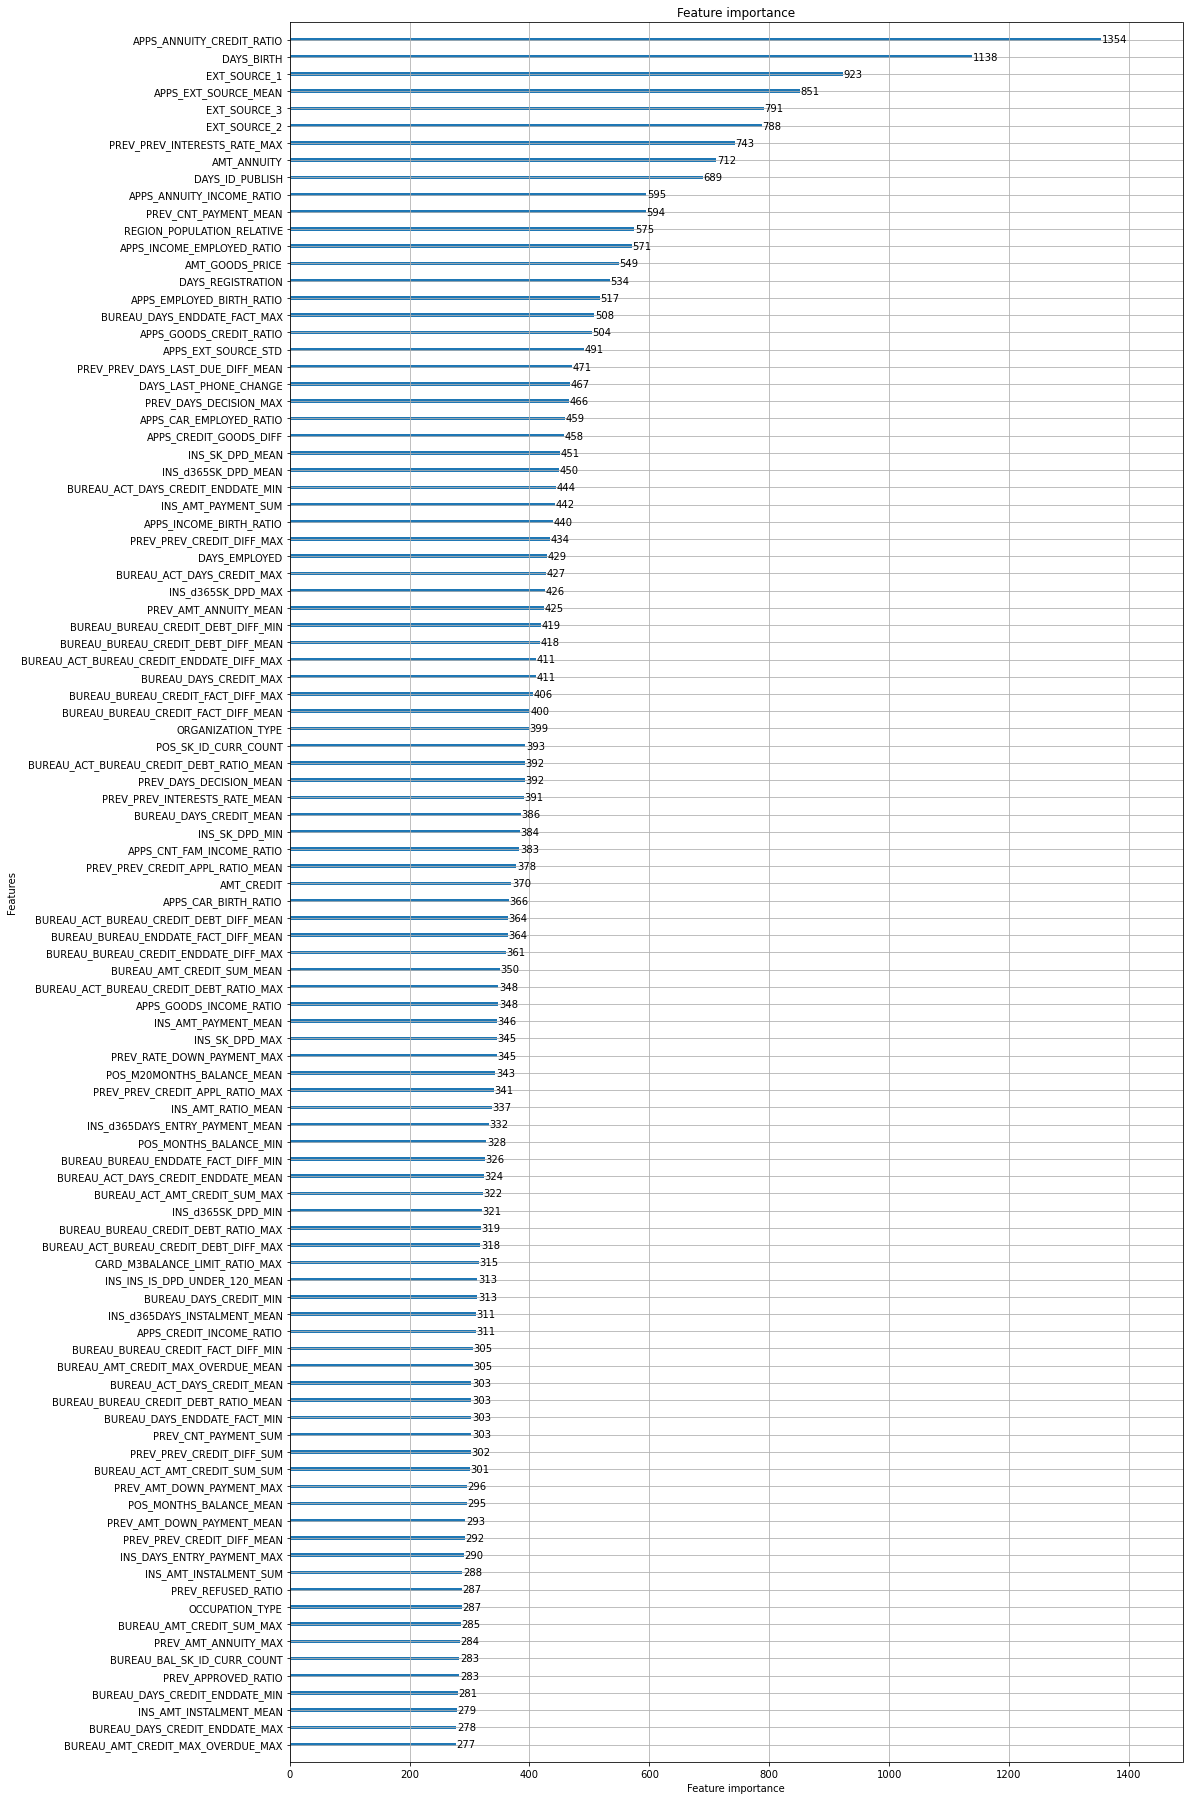

In [65]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32), max_num_features=100)